# Canny Edge Detector
$p.30 \sim p.53$

1. Gaussian filter
2. Find the intensity gradient of the image

  a. Apply a pair of convolution masks

  ![](https://i.imgur.com/EiYaObX.png)

  b. Find the gradient strength and direction with:

  ![](https://i.imgur.com/U5FEiKe.png)

3. Non-maximum Suppression
4. Thresholding edges
5. Hysteresis: The final step. Canny does use two thresholds (upper and lower):
>If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
If a pixel gradient value is below the lower threshold, then it is rejected.
If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.
Canny recommended a upper:lower ratio between 2:1 and 3:1.

[Canny Edge Detector](https://docs.opencv.org/master/da/d5c/tutorial_canny_detector.html)

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/人工智慧於數位訊號分析之應用/HW1')

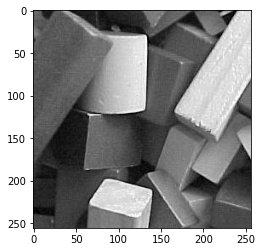

image.shape:  (256, 256)


In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

img_org = cv2.imread("blocks.jpg",0)
plt.imshow(img_org ,cmap='gray')
plt.show()
print('image.shape: ', img_org.shape)


## Step 1. Gaussian filter

original shape: (256, 256)
result shape: (256, 256)


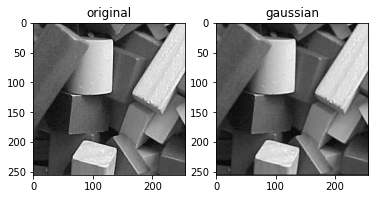

In [ ]:
def padding_img(img,p_size,style='edge'):
  row=np.zeros((p_size,img.shape[1]))
  img=np.row_stack((img,row))
  img=np.row_stack((row,img))
  col=np.zeros((img.shape[0],p_size))
  img=np.column_stack((img,col))
  img=np.column_stack((col,img))
  return img

def gaussian_kernel(KernelSize):
  sigma = 0.3*((KernelSize-1)*0.5 - 1) + 0.8
  Gaussian=[]
  #各係數相加後總值
  total=0
  for i in range(0,KernelSize):
      Filter_list = []
      for j in range(0,KernelSize): 
          #高斯函數公式
          x=-KernelSize//2+j
          y=-KernelSize//2+i
          G_numerator=math.exp(((x**2)+(y**2))/(-2*(sigma**2)))
          G_denominator=2*math.pi*(sigma**2)
          G=G_numerator/G_denominator
          Filter_list.append(G)
          total+=G
      Gaussian+= [Filter_list]
  #print(Gaussia)        
  return np.array(Gaussian)/total

KernelSize = 3
def Gaussian_Filter(KernelSize,image):
    row,col =image.shape
    Gaussian_Kernel = gaussian_kernel(KernelSize)

    resx=np.zeros((row,col),np.uint8)
    padimg = padding_img(image,(KernelSize-1)//2,style='reflect')
    for i in range(resx.shape[0]):
      for j in range(resx.shape[1]):
        for y in range(0,KernelSize):
          for x in range(0,KernelSize):
            resx[i][j]+=padimg[i+y][j+x]*Gaussian_Kernel[y][x]
    return resx
gaussian = Gaussian_Filter(KernelSize, img_org).astype(np.uint8)
print(f"original shape: {img_org.shape}")
print(f"result shape: {gaussian.shape}")
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(img_org ,cmap='gray')
plt.subplot(1,2,2)
plt.title("gaussian")
plt.imshow(gaussian ,cmap='gray')
plt.show()

## Step 2. Filter image with derivative of Gaussian
![](https://i.imgur.com/G4e6Z4n.png)

In [ ]:
def sobel(img, filtering_type):
    h, w = img.shape

    horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
        
    Gx = np.zeros((h - 2, w - 2))
    Gy = np.zeros((h - 2, w - 2))
    
    # ------------ To do ------------- 
    for img_region, i, j in iterate_regions(img, 3):
      for y in range(3):
        for x in range(3):
          Gx[i][j]+=img_region[y][x]*horizontal[y][x]
          Gy[i][j]+=img_region[y][x]*vertical[y][x]
    output=np.zeros((h - 2, w - 2))
    angle=np.zeros((h - 2, w - 2))
    for i in range(h - 2):
      for j in range(w - 2):
        output[i][j]=(Gx[i][j]**2+Gy[i][j]**2)**0.5
        angle[i][j]=math.atan2(Gy[i][j],Gx[i][j])
    print("original shape: ",img_org.shape)
    print("Horizontal Sobel filter shape: ",Gx.shape)
    print("Vertical Sobel filter shape: ",Gy.shape)
    print("Gradient amplitude shape: ",Gy.shape)
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.title("gaussian")
    plt.imshow(gaussian,cmap="gray")
    plt.subplot(2,2,2)
    plt.title("Horizontal Sobel filter")
    plt.imshow(np.clip(Gx,0,255).astype('uint8'),cmap="gray")
    plt.subplot(2,2,3)
    plt.title("Vertical Sobel filter")
    plt.imshow(np.clip(Gy,0,255).astype('uint8'),cmap="gray")
    plt.subplot(2,2,4)
    plt.title("Gradient amplitude")
    plt.imshow(np.clip(output,0,255).astype('uint8'),cmap="gray")
    plt.show()
    return output, angle


def iterate_regions(img, kernel_size):
    h, w = img.shape
    for i in range(h - kernel_size + 1):
        for j in range(w - kernel_size + 1):
            img_region = img[i:(i + kernel_size), j:(j + kernel_size)]
            yield img_region, i, j

original shape:  (256, 256)
Horizontal Sobel filter shape:  (256, 256)
Vertical Sobel filter shape:  (256, 256)
Gradient amplitude shape:  (256, 256)


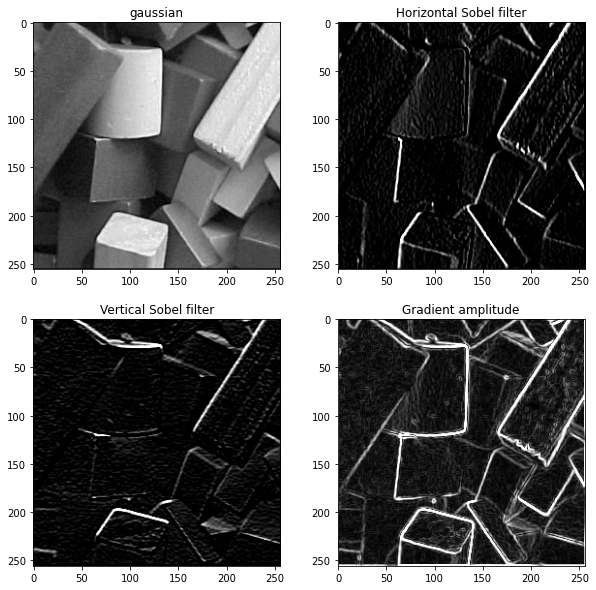

In [ ]:
# ------------ To do ------------- #
padding_gaussian = padding_img(gaussian, 1).astype(np.uint8)
gradient,angle = sobel(padding_gaussian, 'magnitude')

## Step 3. Non-maximum Suppression
Non maximum suppression without interpolation requires us to divide the 3x3 grid of pixels into 8 sections. Ie. if the gradient direction falls in between the angle -22.5 and 22.5, then we use the pixels that fall between this angle (r and q) as the value to compare with pixel p, see image below.

![](https://i.imgur.com/55DLrWn.png)

original shape:  (256, 256)
Horizontal Sobel filter shape:  (256, 256)
Vertical Sobel filter shape:  (256, 256)
Gradient amplitude shape:  (256, 256)


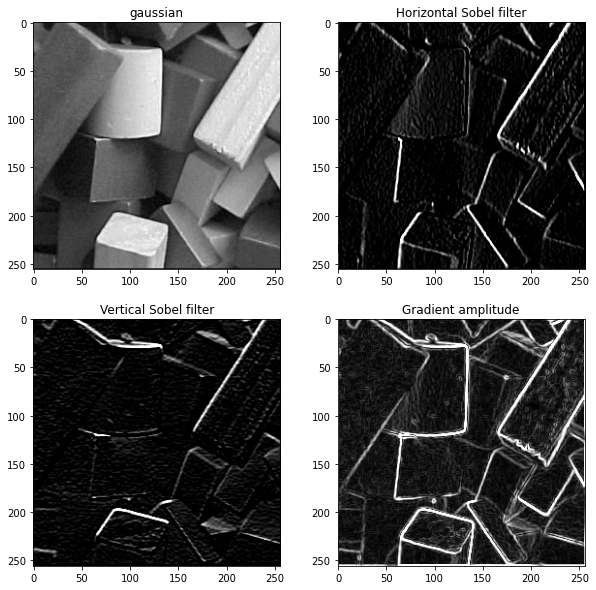

In [ ]:
def non_maximum_suppression(gradient,angle):
    gradient_copy = gradient.copy()
    height,width= gradient.shape
    angle = (angle * 180) / np.pi
    for j in range(1, height-1):
      for i in range(1, width-1):
        # ------------ To do ------------- #
        if 22.5>=angle[j][i]>=-22.5 or 180>=angle[j][i]>=157.5 or -157.5>=angle[j][i]>= -180:
          if gradient_copy[j][i]!=max(gradient_copy[j][i],gradient_copy[j][i-1],gradient_copy[j][i+1]):
            gradient_copy[j][i]=0
        elif 67.5>=angle[j][i]>=22.5 or -112.5>=angle[j][i]>=-157.5:
          if gradient_copy[j][i]!=max(gradient_copy[j][i],gradient_copy[j+1][i-1],gradient_copy[j-1][i+1]):
            gradient_copy[j][i]=0
        elif 112.5>=angle[j][i]>=67.5 or -67.5>=angle[j][i]>=-112.5:
          if gradient_copy[j][i]!=max(gradient_copy[j][i],gradient_copy[j+1][i],gradient_copy[j-1][i]):
            gradient_copy[j][i]=0
        elif 157.5>=angle[j][i]>=112.5 or -22.5>=angle[j][i]>=-67.5:
          if gradient_copy[j][i]!=max(gradient_copy[j][i],gradient_copy[j-1][i-1],gradient_copy[j+1][i+1]):
            gradient_copy[j][i]=0
        else:
          print("???")
    return gradient_copy

gradient,angle = sobel(padding_gaussian, 'magnitude')
After_non_maximum_supression = non_maximum_suppression(gradient,angle)

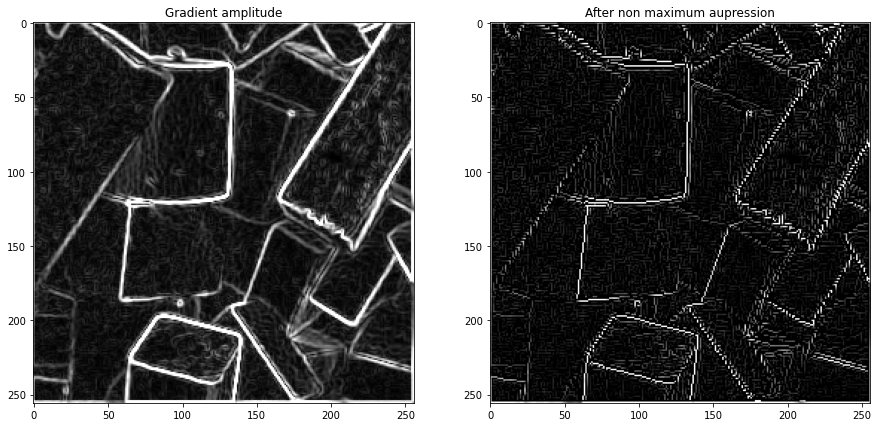

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Gradient amplitude")
plt.imshow(np.clip(gradient,0,255),cmap="gray")
plt.subplot(1,2,2)
plt.title("After non maximum aupression")
plt.imshow(np.clip(After_non_maximum_supression,0,255).astype('uint8'),cmap="gray")
plt.show()

## Step 4. Thresholding edges

In [ ]:
def seperate(img, minimum = 60, maximum = 180):
    # ------------ To do ------------- #
    thresholding=img.copy()
    for j in range(thresholding.shape[0]):
      for i in range(thresholding.shape[1]):
        if thresholding[j][i]>maximum:
          thresholding[j][i]=255
        elif thresholding[j][i]<minimum:
          thresholding[j][i]=0
        else:
          thresholding[j][i]=60
    return thresholding
After_non_maximum_supression = np.clip(After_non_maximum_supression,0,255).astype('uint8')
thresholding = seperate(After_non_maximum_supression, minimum = 15, maximum = 90)

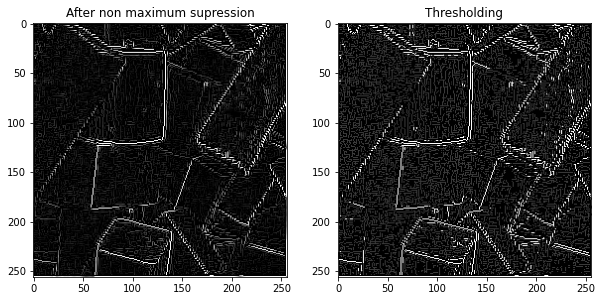

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("After non maximum supression")
plt.imshow(After_non_maximum_supression,cmap="gray")
plt.subplot(1,2,2)
plt.title("Thresholding")
plt.imshow(thresholding,cmap="gray")
plt.show()

## Step 5. Hysteresis

In [ ]:
def DFS(output, color, y, x):
  color[y][x] = 1
  for yy, xx in around(y, x):
    if yy < 0 or yy >= output.shape[0] or xx < 0 or xx >= output.shape[1]:
      continue
    if output[yy][xx] == weak and color[yy][xx] == 0:
      if DFS(output, color, yy, xx):
        output[y][x] = 255
    elif output[yy][xx] == 255:
      output[y][x] = 255
  if output[y][x] == 255:
    color[y][x] = 2
    return True
  else:
    color[y][x] = 2
    return False

def Connect(img,weak=60):
  # ------------ To do ------------- #
  output=img.copy()
  color = np.zeros(output.shape)
  for y in range(output.shape[0]):
    for x in range(output.shape[1]):
      if output[y][x] == 255:
        DFS(output, color, y, x)
  return output

def around(y, x):
  for u in range(-1,2):
    for v in range(-1,2):
      if u != 0 or v != 0:
        yield y + u, x + v
weak=60
dst_img = Connect(thresholding,weak)
dst_img = (dst_img == 255) * dst_img

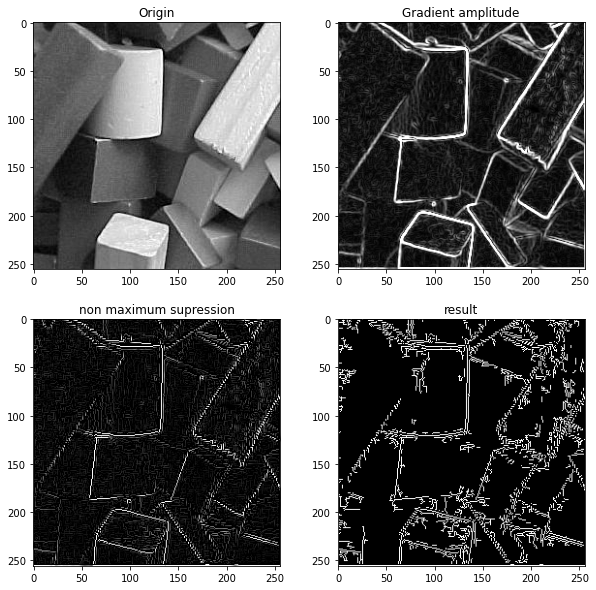

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Origin")
plt.imshow(np.clip(img_org,0,255),cmap="gray")
plt.subplot(2,2,2)
plt.title("Gradient amplitude")
plt.imshow(np.clip(gradient,0,255).astype('uint'),cmap="gray")
plt.subplot(2,2,3)
plt.title("non maximum supression")
plt.imshow(np.clip(After_non_maximum_supression,0,255),cmap="gray")
plt.subplot(2,2,4)
plt.title("result")
plt.imshow(np.clip(dst_img,0,255).astype('uint'),cmap="gray")
plt.show()

# Canny Edge OpenCV 套件


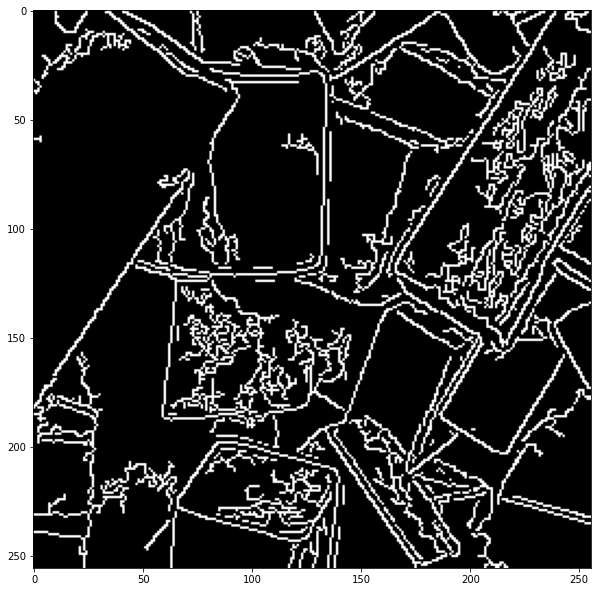

In [ ]:
low_threshold = 15
high_threshold = 90
kernel_size = 3
#這邊較低的threshold用於檢測圖像中明顯的邊緣，較高的threshold則將間斷的邊緣連接起來。
plt.figure(figsize=(10,18))
img2 = cv2.imread("blocks.jpg",0)
gray_blur = cv2.GaussianBlur(img2,(kernel_size, kernel_size),0)
edges = cv2.Canny(gray_blur, low_threshold, high_threshold)
plt.imshow(edges, cmap='Greys_r')
plt.show()

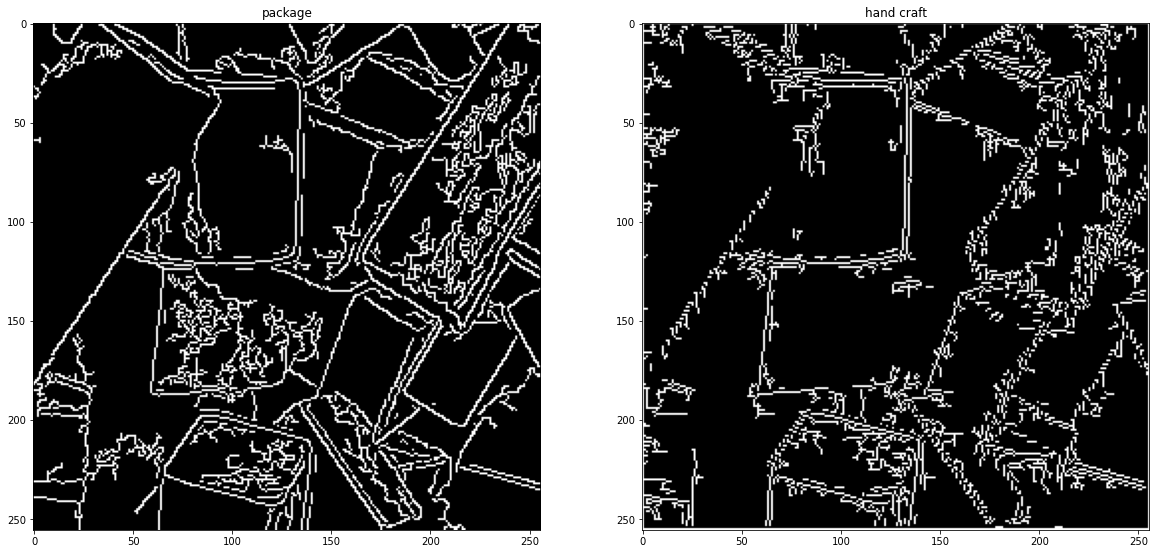

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("package")
plt.imshow(np.clip(edges,0,255).astype('uint'),cmap="gray")
plt.subplot(1,2,2)
plt.title("hand craft")
plt.imshow(np.clip(dst_img,0,255).astype('uint'),cmap="gray")
plt.show()

# 加分討論：為什麼和套件不一樣？

從上面的圖片可以觀察出，使用手刻的方法，對於斜線偵測較不敏感

因此我推斷差別是在於non-maximum suppression的部分

